<a href="https://colab.research.google.com/github/audyfebryantii/potato/blob/main/yolov5_potato_1m_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 17483 (delta 77), reused 29 (delta 29), pack-reused 17378 (from 4)
Receiving objects: 100% (17483/17483), 16.35 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.1/727.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 832.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 M

In [2]:
import os
print(os.getcwd())

/content/yolov5


In [3]:
import torch
import random
import numpy as np

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SYLND05UAeOcirwZfGFJ")
project = rf.workspace("potato-lxebf").project("potato-coba")
version = project.version(4)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to potato-coba-4 in yolov5pytorch:: 100%|██████████| 486/486 [00:00<00:00, 8872.47it/s]


In [5]:
dataset.location

'/content/yolov5/potato-coba-4'

In [6]:
# from yolov5 import train

set_seed(42)

In [7]:
!python train.py --img 640 --batch 32 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-22 15:52:46.251476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747929166.480211    1014 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747929166.540412    1014 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [8]:
!ls runs/train/exp

confusion_matrix.png				    R_curve.png
events.out.tfevents.1747929201.943937792e74.1014.0  results.csv
F1_curve.png					    results.png
hyp.yaml					    train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
opt.yaml					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.8 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/potato-coba-4/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/yolov5/potato-coba-4/test/images/DSCN7610_MOV-0002_jpg.rf.3be22fddae02b514bb50169c06b0c412.jpg: 640x640 20 potatos, 15.9ms
image 2/5 /content/yolov5/potato-coba-4/test/images/DSCN7610_MOV-0003_jpg.rf.faed7a17c505f193007f15b6a06da8ce.jpg: 640x640 20 potatos, 11.4ms
image 3/5

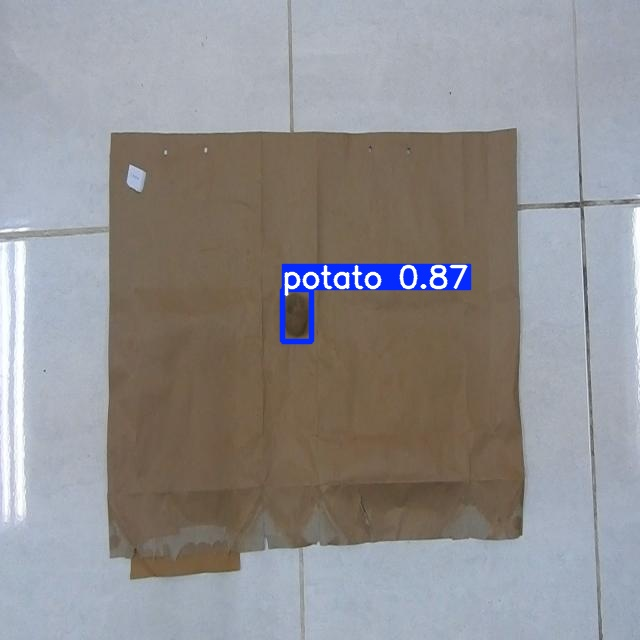

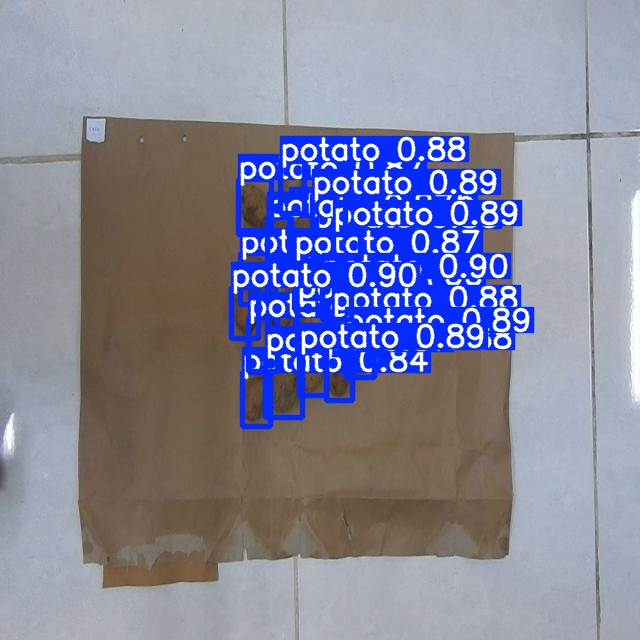

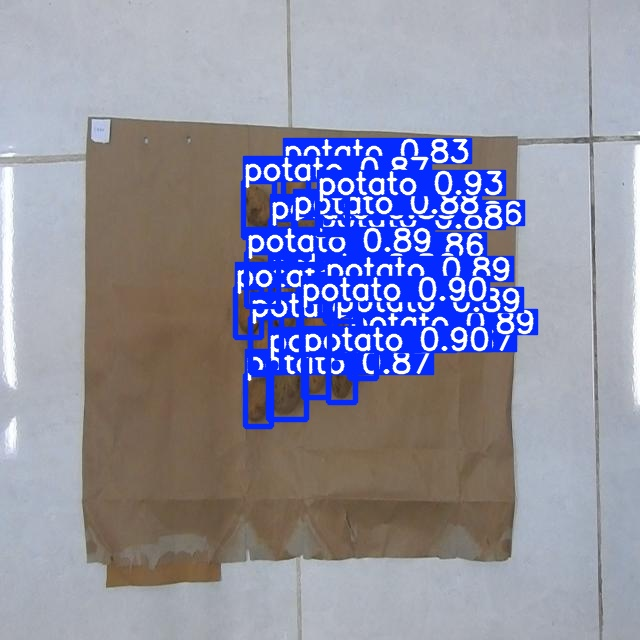

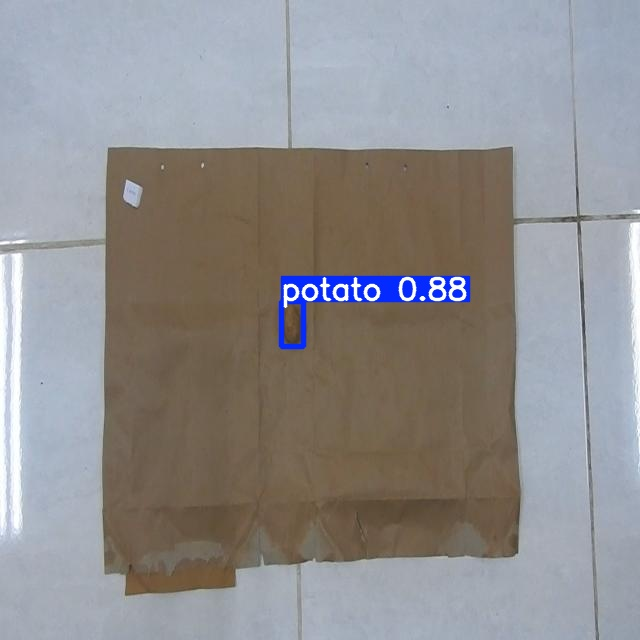

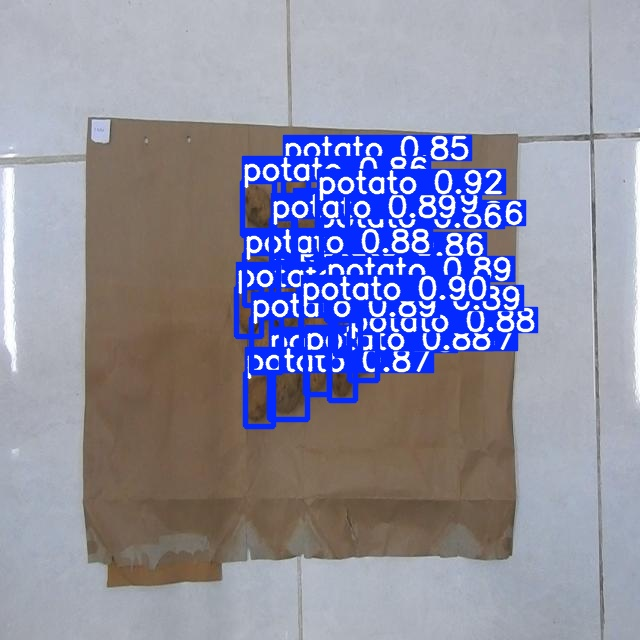

In [20]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [12]:
Result_Final_model = pd.read_csv('runs/train/exp/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
40,40,0.038295,0.042957,0,0.78530,1.0,0.81992,0.54941,0.029163,0.023930,0,0.002278,0.002278,0.002278
41,41,0.035505,0.039311,0,0.78533,1.0,0.82175,0.57221,0.028529,0.022905,0,0.002080,0.002080,0.002080
42,42,0.035152,0.033833,0,0.78534,1.0,0.81919,0.58274,0.028846,0.022854,0,0.001882,0.001882,0.001882
43,43,0.036186,0.041656,0,0.78527,1.0,0.80600,0.56655,0.029236,0.022865,0,0.001684,0.001684,0.001684
44,44,0.034484,0.037033,0,0.78535,1.0,0.80419,0.54011,0.029517,0.022884,0,0.001486,0.001486,0.001486
45,45,0.035199,0.038786,0,0.78544,1.0,0.82029,0.57993,0.027238,0.022451,0,0.001288,0.001288,0.001288
46,46,0.035380,0.036985,0,0.78547,1.0,0.81435,0.55325,0.028025,0.023062,0,0.001090,0.001090,0.001090
47,47,0.034703,0.038577,0,0.78531,1.0,0.81146,0.58793,0.026775,0.022467,0,0.000892,0.000892,0.000892
48,48,0.035025,0.039094,0,0.78533,1.0,0.80969,0.56483,0.027669,0.022537,0,0.000694,0.000694,0.000694
49,49,0.033144,0.034872,0,0.78531,1.0,0.81866,0.60906,0.025594,0.022303,0,0.000496,0.000496,0.000496


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('runs/train/exp/results.csv')

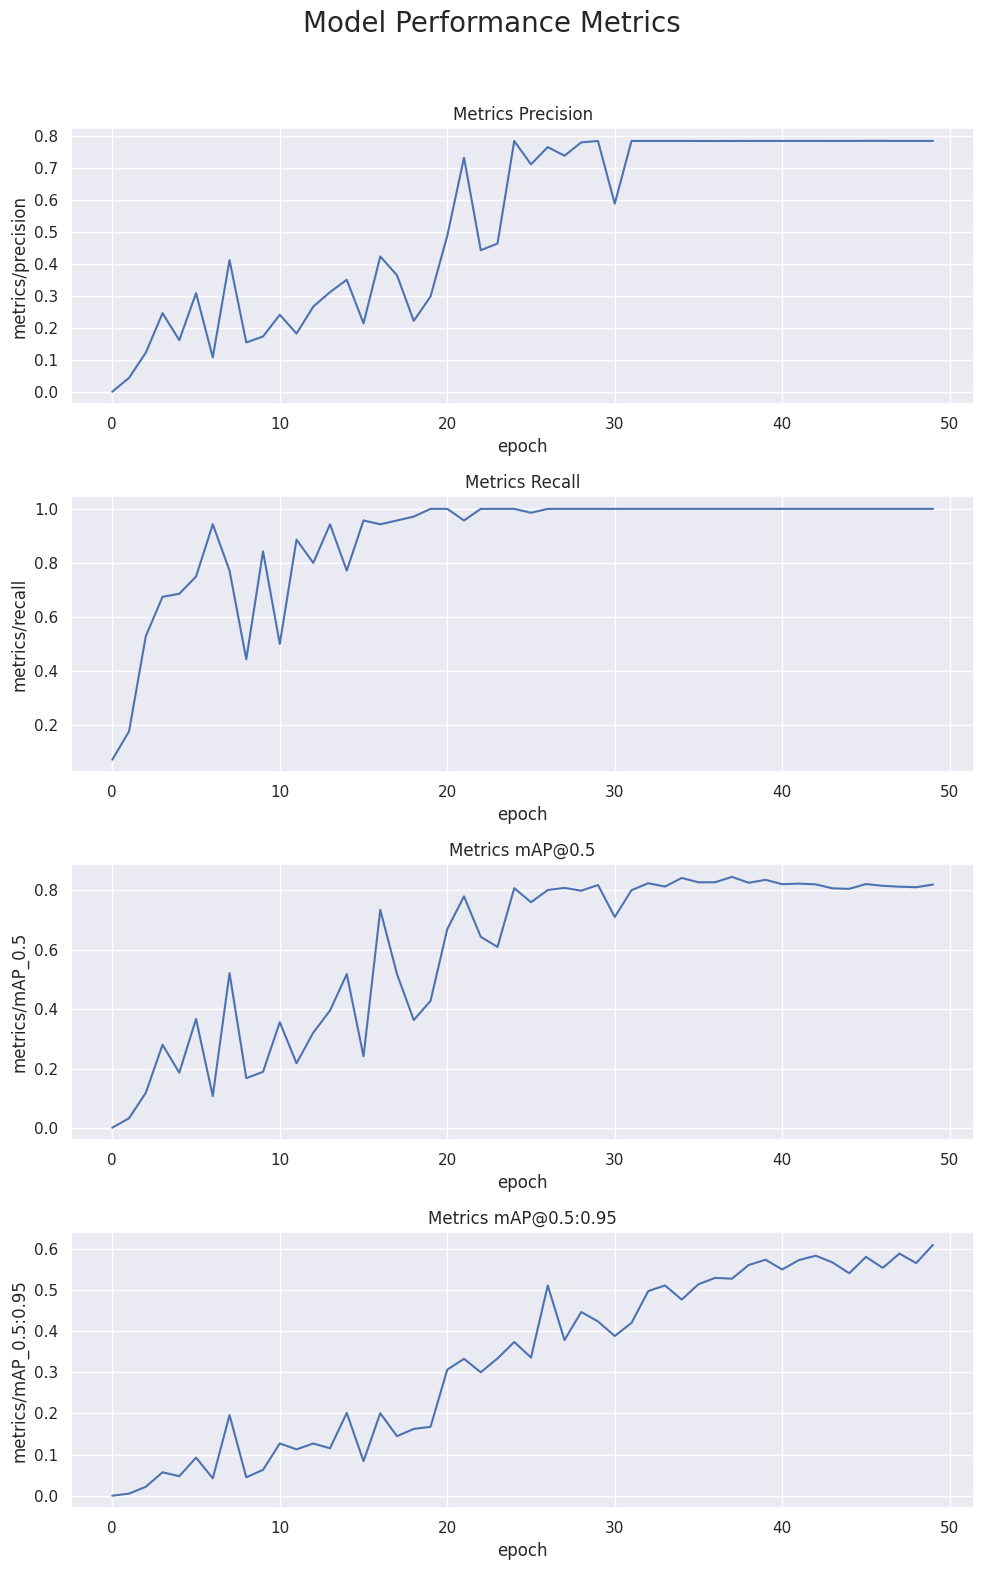

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#Strip any leading or trailing whitespace from the column names
df.columns = df.columns.str.strip()

#Create subplots with 4 rows and 1 column
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,16))

# Plot the selected metric columns
sns.lineplot(x='epoch', y='metrics/precision', data=df, ax=axs[0])
axs[0].set(title="Metrics Precision")

sns.lineplot(x='epoch', y='metrics/recall', data=df, ax=axs[1])
axs[1].set(title="Metrics Recall")

sns.lineplot(x='epoch', y='metrics/mAP_0.5', data=df, ax=axs[2])
axs[2].set(title="Metrics mAP@0.5")

sns.lineplot(x='epoch', y='metrics/mAP_0.5:0.95', data=df, ax=axs[3])
axs[3].set(title="Metrics mAP@0.5:0.95")

#Overall figure title and layout adjustment
plt.suptitle('Model Performance Metrics', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [27]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.8 --source /content/markus-spiske-484GsKrL5r8-unsplash.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/markus-spiske-484GsKrL5r8-unsplash.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/markus-spiske-484GsKrL5r8-unsplash.jpg: 448x640 17 potatos, 29.8ms
Speed: 0.5ms pre-process, 29.8ms inference, 140.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


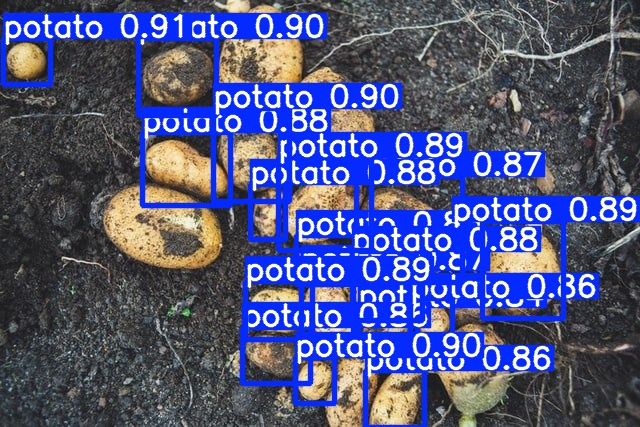

In [28]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp7/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


Jumlah bounding box dengan confidence >= 0.8: 17


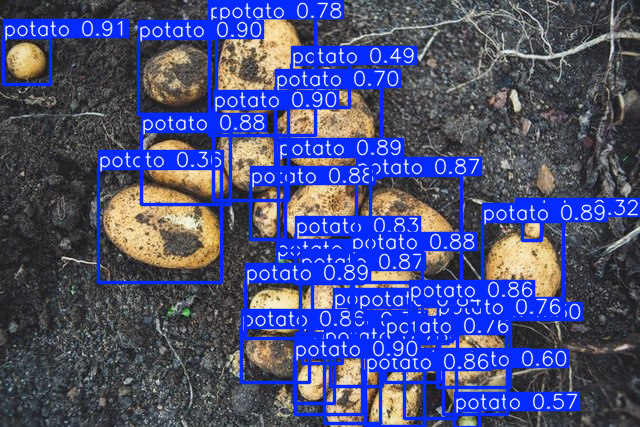

In [31]:
import torch
from PIL import Image

# Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)

# Gambar asli, bukan hasil output detect.py
img_path = '/content/markus-spiske-484GsKrL5r8-unsplash.jpg'
img = Image.open(img_path)

# Inferensi
results = model(img, size=640)

# Dataframe hasil deteksi
df = results.pandas().xyxy[0]

# Filter berdasarkan confidence threshold
filtered = df[df['confidence'] >= 0.8]

# Hitung jumlah bbox
count = filtered.shape[0]
print(f'Jumlah bounding box dengan confidence >= 0.8: {count}')

# Tampilkan gambar hasil deteksi (opsional)
results.show()
